In [1]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 14.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 74.5 MB/s eta 0:00:0000:0100:01


In [2]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Resize image to same size
IMG_SIZE = (80,80)

channels = 1
char_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [4]:
# Loop through every folder, grabbing the name of the folder,
# and getting the number of images in that folder.
# And storing all that information inside the dictionary
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [5]:
# Grab the names of the first 10 elements in char_dict and store in the list
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break

characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [6]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.8683066368103027s
[INFO] At 1000 files
[INFO] 1454 files found in 0.8349423408508301s
[INFO] At 1000 files
[INFO] 1452 files found in 1.0025055408477783s
[INFO] At 1000 files
[INFO] 1354 files found in 0.7072031497955322s
[INFO] At 1000 files
[INFO] 1342 files found in 0.5339004993438721s
[INFO] At 1000 files
[INFO] 1291 files found in 0.4167294502258301s
[INFO] At 1000 files
[INFO] 1206 files found in 0.1776599884033203s
[INFO] At 1000 files
[INFO] 1194 files found in 0.13532114028930664s
[INFO] At 1000 files
[INFO] 1193 files found in 0.14014005661010742s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004697561264038086s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 25s


The **training set** is basically a list of **13,811 lists** inside it. Inside each of that sub lists is 2 elements, the actual array and the labels itself. 

In [7]:
# Number of images in the training set
len(train)

13811

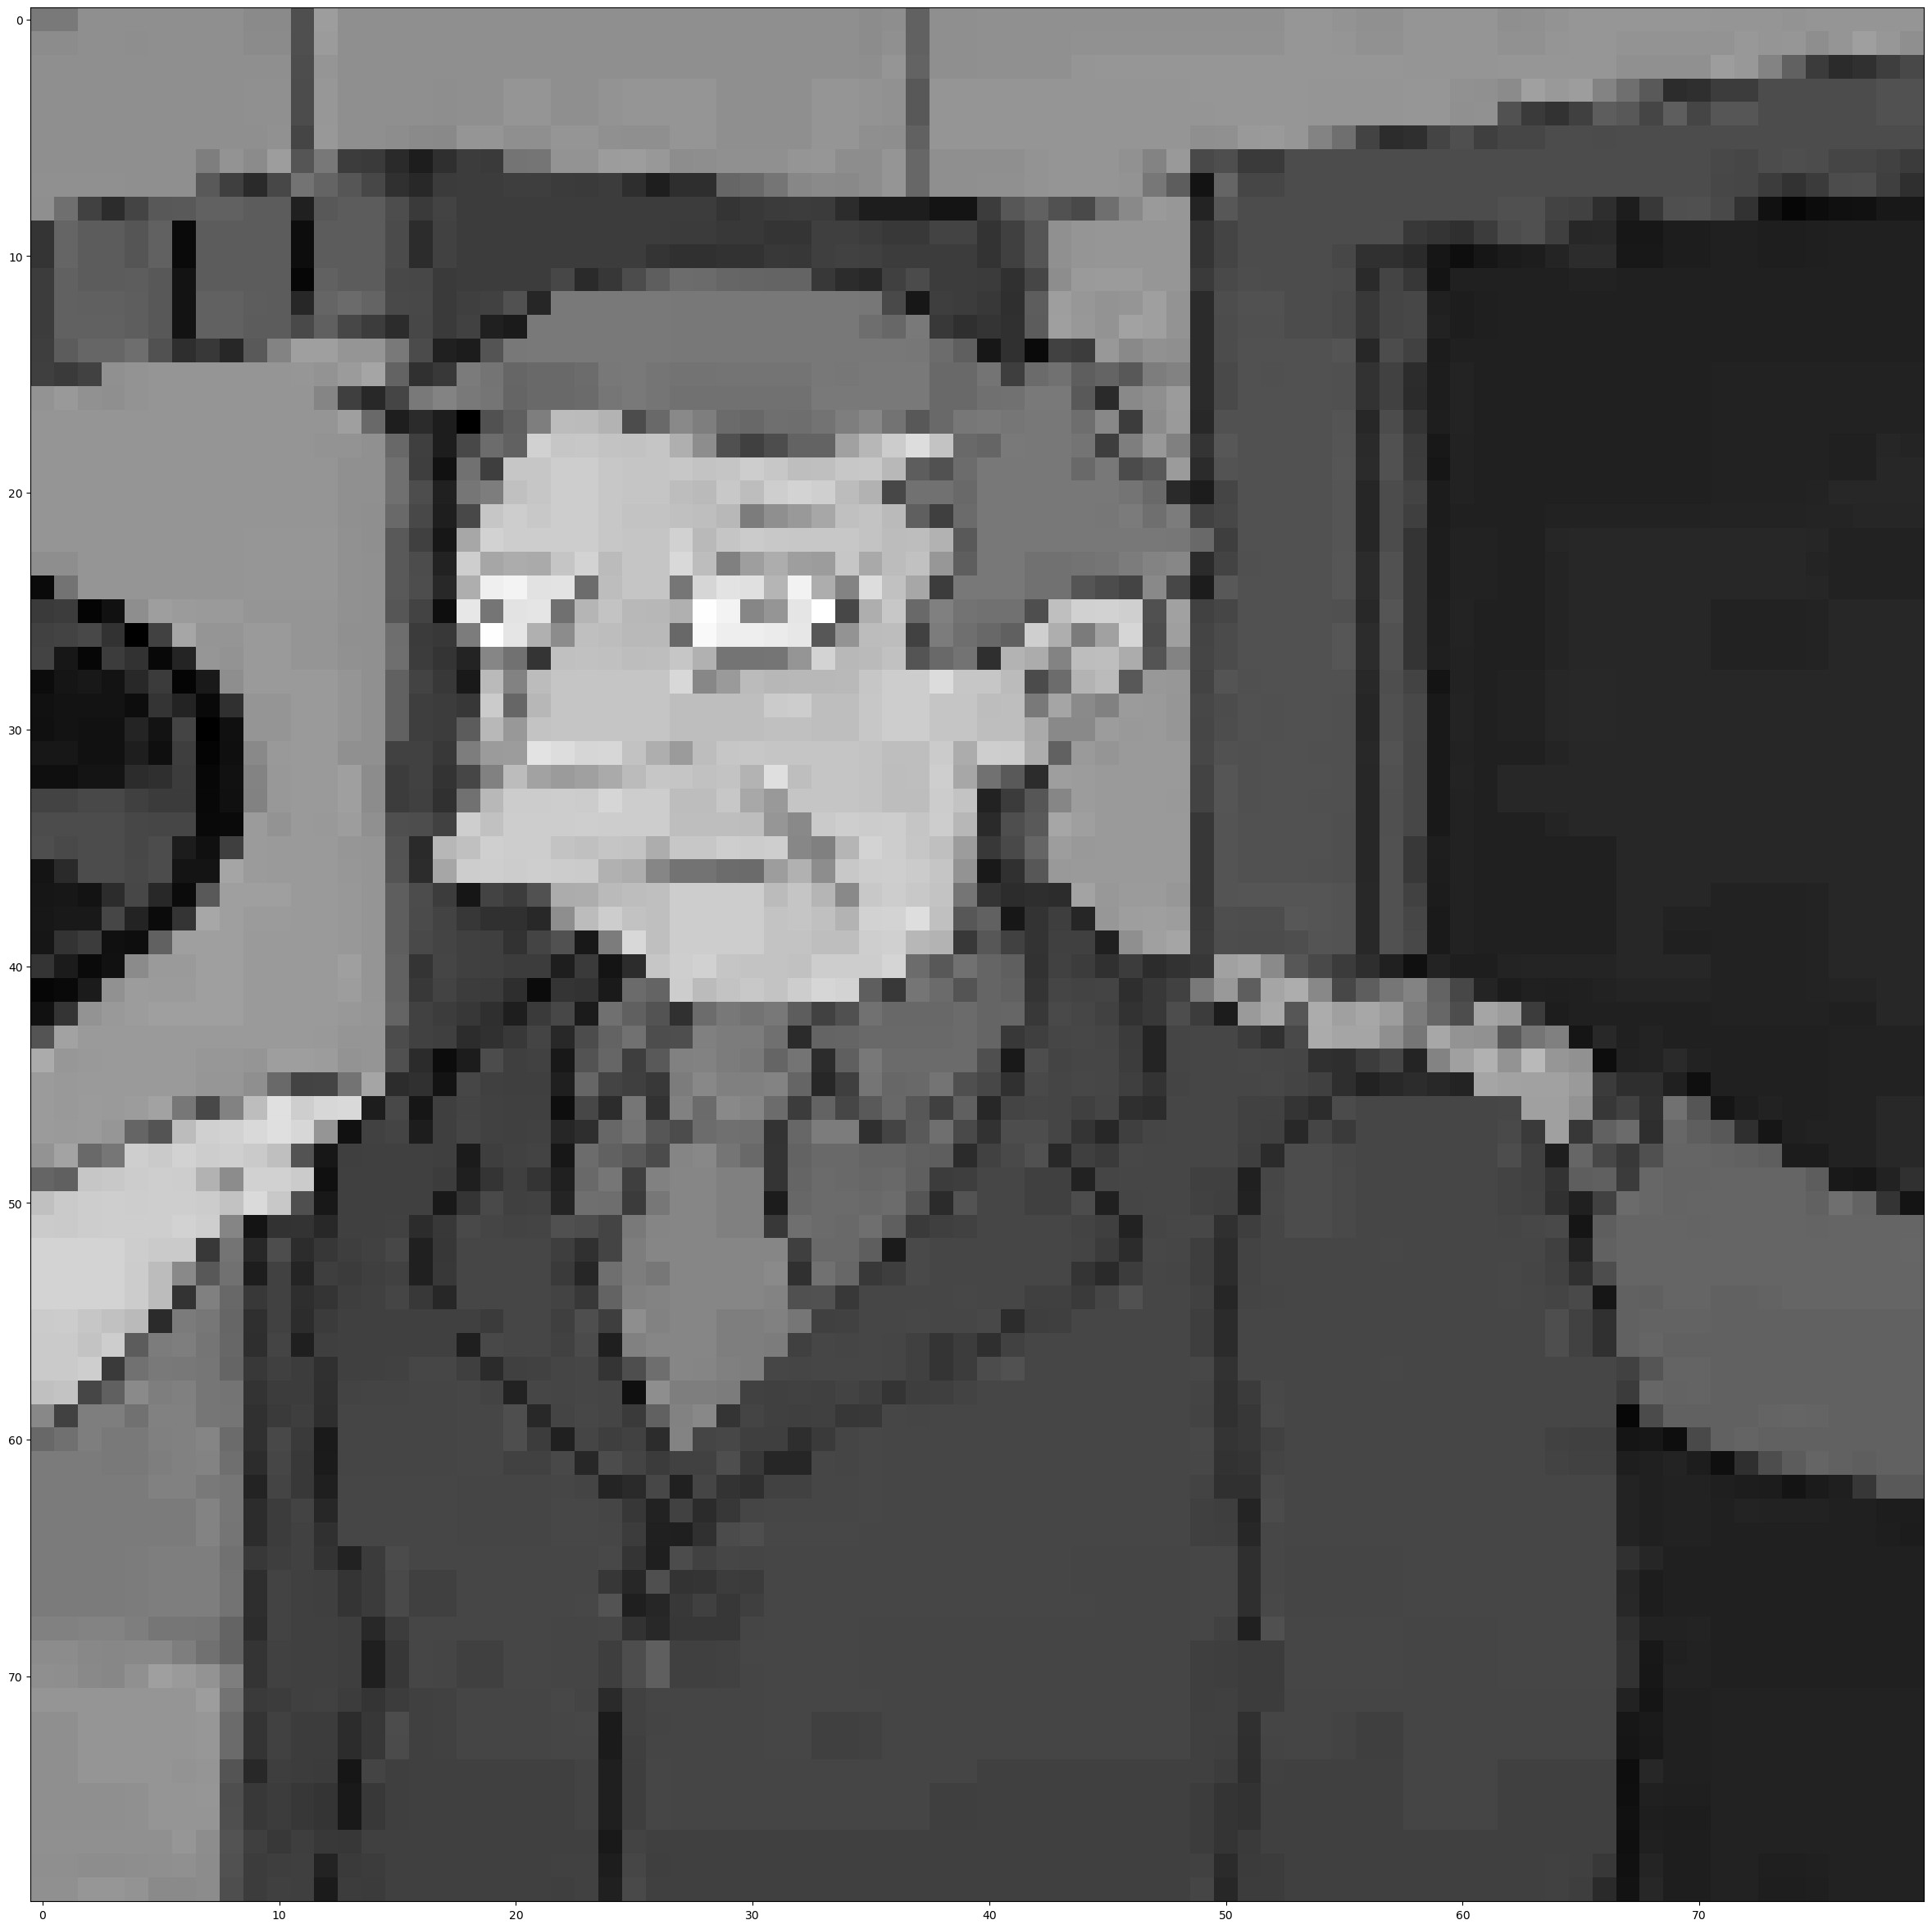

In [9]:
# Visualize images in training set
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [10]:
# Separate features and labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [11]:
from tensorflow.keras.utils import to_categorical
# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [12]:
# Split into Train-Test
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=0.2)

In [13]:
del train
del featureSet
del labels
gc.collect()

0

In [14]:
BATCH_SIZE = 32
EPOCHS =10

In [15]:
# Image data generator --> synthesize new images from already existing images to help introduce some randomness to our network

# Instantiate image generator
datagen = canaro.generators.imageDataGenerator()

# Training generator
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [26]:
import tensorflow as tf

In [30]:
# Copyright (c) 2020 Jason Dsouza <jasmcaus@gmail.com>
# Protected under the MIT License (see LICENSE)

# Surpressing Tensorflow Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Importing the necessary packages
# from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

# IMG_SIZE = (80,80)
# LEARNING_RATE = 0.001
# DECAY = 1e-6
# MOMENTUM = .9
# EPOCHS = 5
# BATCH_SIZE = 32

def createSimpsonsModel(IMG_SIZE=(224,224), channels=1, output_dim=1, loss='binary_crossentropy', decay=None, learning_rate=None, momentum=None, nesterov=None):
    if not isinstance(output_dim, int):
        raise ValueError('[ERROR] Output dimensions need to be an integer')
    if not isinstance(channels, int):
        raise ValueError('[ERROR] Channels needs to be an integer')

    # # If 'channels first', update the input_shape
    # if backend.image_data_format() == 'channels_first':
    #     input_shape = (channels, img_size,img_size)
        
    w, h = IMG_SIZE[:2]
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h,channels)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    
    # Output Layer
    model.add(Dense(output_dim, activation='softmax'))

    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate, decay=decay, momentum=momentum, nesterov=nesterov)

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

In [31]:
model = createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters),
                                         loss='binary_crossentropy', decay=1e-6, learning_rate=0.001,
                                         momentum=0.9, nesterov=True)

Note: The nesterov parameter in the createSimpsonsModel function of the canaro module refers to the Nesterov momentum. Nesterov momentum is a variant of the standard momentum optimization algorithm used in gradient descent optimization.

In the context of deep learning models, momentum optimization helps accelerate the learning process by taking into account the past gradients to determine the current update direction. Nesterov momentum improves upon the standard momentum method by considering the future gradient in addition to the past gradient. This allows the optimizer to make more accurate updates and converge faster.

In [32]:
# Model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 80, 80, 32)        320       
                                                                 
 conv2d_73 (Conv2D)          (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 39, 39, 32)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 39, 39, 64)        18496     
                                                                 
 conv2d_75 (Conv2D)          (None, 37, 37, 64)        36928     
                                                     

In [33]:
# Create callbacks list to schedule the learning rate at specific intervals 
# so that our network can essentailly train better
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

Note: LearningRateScheduler is a callback in Keras that allows you to schedule the learning rate during training. It can be used to adjust the learning rate dynamically based on specific rules or conditions.

In [35]:
# Training
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val, y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks=callbacks_list)

Epoch 1/10


2023-07-04 05:20:28.266463: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/dropout_48/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


345/345 [==============================] - 24s 42ms/step - loss: 0.3473 - accuracy: 0.1560 - val_loss: 0.3288 - val_accuracy: 0.1606 - lr: 0.0100
Epoch 2/10
345/345 [==============================] - 12s 34ms/step - loss: 0.3237 - accuracy: 0.1596 - lr: 0.0100
Epoch 3/10
345/345 [==============================] - 12s 35ms/step - loss: 0.3233 - accuracy: 0.1626 - lr: 0.0100
Epoch 4/10
345/345 [==============================] - 12s 36ms/step - loss: 0.3229 - accuracy: 0.1604 - lr: 0.0100
Epoch 5/10
345/345 [==============================] - 12s 34ms/step - loss: 0.3209 - accuracy: 0.1680 - lr: 0.0100
Epoch 6/10
345/345 [==============================] - 12s 36ms/step - loss: 0.3104 - accuracy: 0.2161 - lr: 0.0100
Epoch 7/10
345/345 [==============================] - 12s 34ms/step - loss: 0.3052 - accuracy: 0.2381 - lr: 0.0100
Epoch 8/10
345/345 [==============================] - 12s 36ms/step - loss: 0.3026 - accuracy: 0.2518 - lr: 0.0100
Epoch 9/10
345/345 [=============================

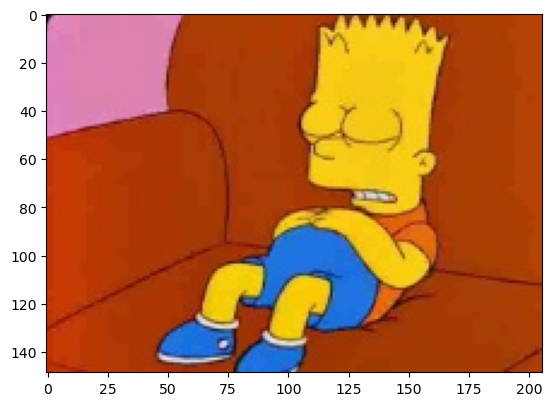

In [37]:
test_path = r'/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_10.jpg'

img = cv.imread(test_path)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [38]:
# Prepare he img as train_set 
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE)
    img = caer.reshape(img, IMG_SIZE, 1)
    return img

In [39]:
predictions = model.predict(prepare(img))

1/1 [==============================] - 0s 346ms/step


In [40]:
predictions

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
print(characters[np.argmax(predictions[0])])

lisa_simpson
